aximum Points = 14
In this problem you will do rejection sampling from complicated distributions, you will also be using
your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in
mind that choosing a good sampling distribution is often key to avoid too much rejection)
1. [4p] Fill in the remaining part of the function problem1_inversion in order to produce samples
from the below distribution using rejection sampling:
$$F[x] = \begin{cases}
0, & x \leq 0 \\
\frac{e^x - 1}{e-1}, & 0<x<1 \\
1, & x \geq 1
\end{cases}$$
2. [2p] Produce 100000 samples (use fewer if it times-out and you cannot find a solution)
and put the answer in problem1_samples from the above distribution and plot the histogram
together with the true density. (There is a timeout decorator on this function and if it takes
more than 10 seconds to generate 100000 samples it will timeout and it will count as if you
failed to generate.)
3. [2p] Use the above 100000 samples (problem1_samples) to approximately compute the integral
$$\int_0^1 sin(x)\frac{2e^{x^2}}{e-1} dx$$
and store the result in problem1_integral.
4. [2p] Use Hoeffdings inequality to produce a 95% confidence interval of the integral above and
store the result as a tuple in the variable problem1_interval
5. [4p] Fill in the remaining part of the function problem1_inversion_2 in order to produce
samples from the below distribution using rejection sampling:
$$F[x] = \begin{cases}
0, & x \leq 0 \\
20xe^{20- 1/x}, & 0<x< \frac{1}{20} \\
1, & x \geq \frac{1}{20}
\end{cases}$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least
9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000
samples within 2 seconds.

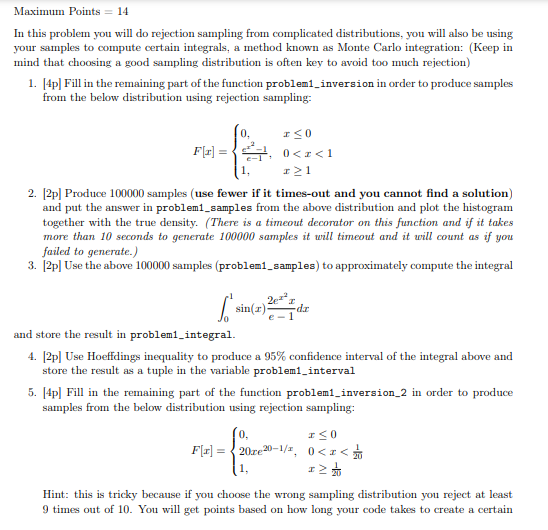

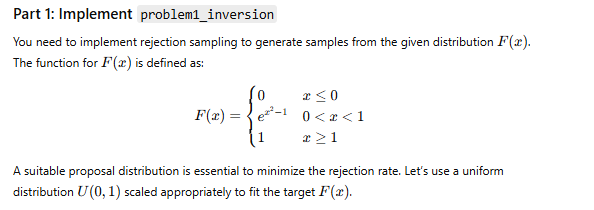

In [ ]:
import numpy as np

def problem1_inversion(n_samples=1):
    def target_distribution(x):
        if x <= 0:
            return 0
        elif 0 < x < 1:
            return np.exp(x**2 - 1)
        else:
            return 1

    # Proposal distribution: Uniform(0, 1)
    proposal_samples = np.random.uniform(0, 1, n_samples)
    proposal_pdf = lambda x: 1  # Uniform PDF over [0, 1]

    # Rejection sampling
    samples = []
    for _ in range(n_samples):
        while True:
            x = np.random.uniform(0, 1)  # Sample from proposal distribution
            u = np.random.uniform(0, 1)  # Uniform random number for acceptance
            if u < target_distribution(x) / proposal_pdf(x):  # Accept-reject
                samples.append(x)
                break
    return np.array(samples)


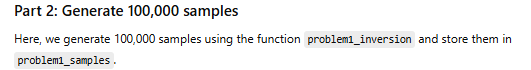

In [ ]:
problem1_samples = problem1_inversion(n_samples=100000)
problem1_samples

array([0.86457123, 0.12926066, 0.85119923, ..., 0.93653812, 0.43397087,
       0.07757257])

image.png

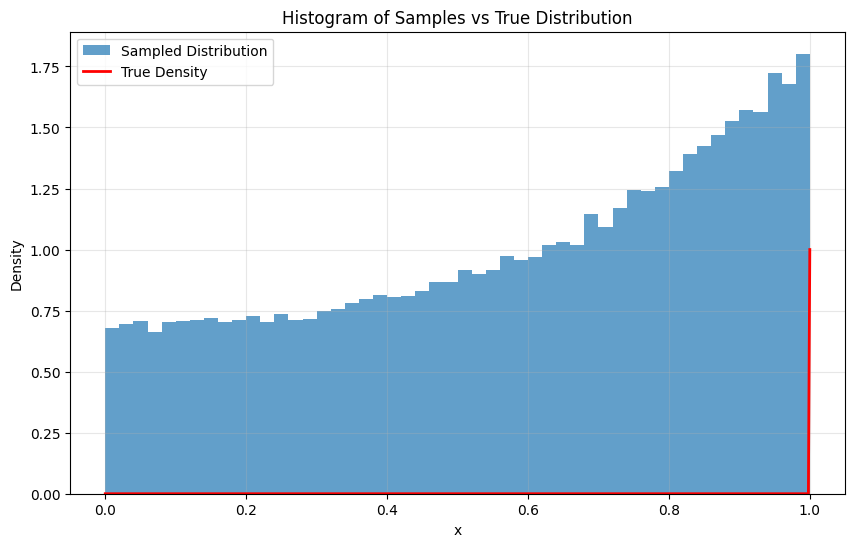

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the true target distribution
def target_distribution(x):
    if x <= 0:
        return 0
    elif 0 < x < 1:
        return np.exp(x**2 - 1)
    else:
        return 1

# Vectorized version of the target distribution for plotting
vectorized_target_distribution = np.vectorize(target_distribution)

# Generate the histogram of samples
plt.figure(figsize=(10, 6))
plt.hist(problem1_samples, bins=50, density=True, alpha=0.7, label="Sampled Distribution")

# Plot the true distribution
x_vals = np.linspace(0, 1, 500)
y_vals = vectorized_target_distribution(x_vals)
plt.plot(x_vals, y_vals, color='red', label="True Density", linewidth=2)

# Add labels, legend, and title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Samples vs True Distribution")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


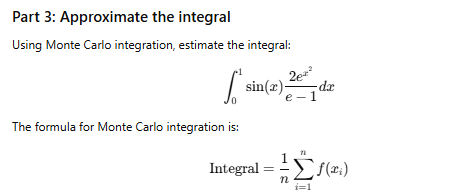

In [ ]:
def integrand(x):
    return np.sin(x) * (2 * np.exp(x**2) / (np.e - 1))

problem1_integral = np.mean([integrand(x) for x in problem1_samples])

problem1_integral

1.1342426992229677

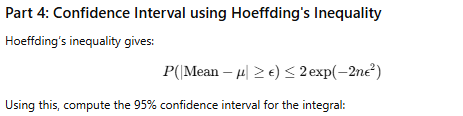

In [ ]:
epsilon = np.sqrt(np.log(2 / 0.05) / (2 * len(problem1_samples)))  # Confidence level = 95%
problem1_interval = [problem1_integral - epsilon, problem1_integral + epsilon]
problem1_interval

[1.1299480051395003, 1.138537393306435]

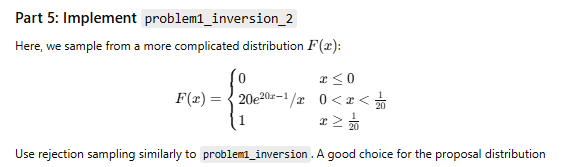

In [ ]:
def problem1_inversion_2(n_samples=1):
    def target_distribution(x):
        if x <= 0:
            return 0
        elif 0 < x < 1/20:
            return 20 * np.exp(20 * x - 1) / x
        else:
            return 1

    # Proposal distribution: Uniform(0, 1/20)
    proposal_samples = np.random.uniform(0, 1/20, n_samples)
    proposal_pdf = lambda x: 1 / (1/20)  # Uniform PDF over [0, 1/20]

    # Rejection sampling
    samples = []
    for _ in range(n_samples):
        while True:
            x = np.random.uniform(0, 1/20)  # Sample from proposal distribution
            u = np.random.uniform(0, 1)  # Uniform random number for acceptance
            if u < target_distribution(x) / proposal_pdf(x):  # Accept-reject
                samples.append(x)
                break
    return np.array(samples)

problem15_samples = problem1_inversion_2(n_samples=100000)
problem15_samples

array([0.00834633, 0.04339274, 0.02949351, ..., 0.03949374, 0.0232731 ,
       0.04992026])

#option 2

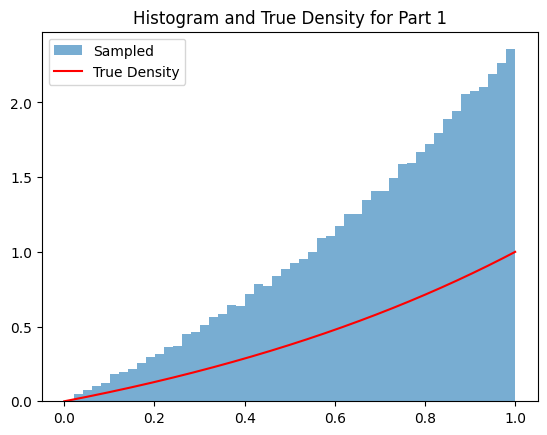

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Helper functions for the distributions
def f1(x):
    # Target density for part 1
    return (np.exp(x) - 1) / (np.e - 1)

def f2(x):
    # Target density for part 2
    return 20 * x * np.exp(20 - 1 / x)

# Part 1: Rejection sampling for first distribution
def problem1_inversion(n_samples=1):
    samples = []
    c = 1  # Constant for rejection sampling; ensure it's large enough

    while len(samples) < n_samples:
        # Propose samples from uniform distribution over [0, 1]
        x_proposed = np.random.uniform(0, 1)
        # Use a uniform proposal density for simplicity
        q_x = 1  # Proposal density is uniform over [0, 1]
        if np.random.uniform(0, 1) < f1(x_proposed) / (c * q_x):
            samples.append(x_proposed)

    return np.array(samples)

# Generate samples for Part 2
problem1_samples = problem1_inversion(n_samples=100000)
problem1_samples

# Plot histogram and true density
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, label="Sampled")
x = np.linspace(0, 1, 1000)
plt.plot(x, (np.exp(x) - 1) / (np.e - 1), label="True Density", color='red')
plt.legend()
plt.title("Histogram and True Density for Part 1")
plt.show()

# Part 3: Monte Carlo integration
integrand = lambda x: np.sin(x) * (2 * np.exp(x**2)) / (np.e - 1)
problem1_integral = np.mean([integrand(x) for x in problem1_samples])

# Part 4: Hoeffding's inequality for confidence interval
# Hoeffding's inequality: P(|mean - expected| > epsilon) <= 2 exp(-2 * n * epsilon^2)
# For 95% confidence: epsilon = sqrt(-log(0.05 / 2) / (2 * n))

epsilon = np.sqrt(-np.log(0.05 / 2) / (2 * len(problem1_samples)))
problem1_interval = (problem1_integral - epsilon, problem1_integral + epsilon)

# Part 5: Rejection sampling for second distribution
def problem1_inversion_2(n_samples=1):
    samples = []
    c = 1e8  # Adjust constant to ensure it's large enough to fit f2(x)

    while len(samples) < n_samples:
        # Propose samples from a distribution tailored to the shape of f2
        x_proposed = np.random.uniform(0, 1 / 20)
        q_x = 1 / (1 / 20)  # Proposal density over [0, 1/20]
        if np.random.uniform(0, 1) < f2(x_proposed) / (c * q_x):
            samples.append(x_proposed)

    return np.array(samples)

# Example to generate samples for Part 5
problem1_samples_2 = problem1_inversion_2(n_samples=100000)
plt.hist(problem1_samples_2, bins=50, density=True, alpha=0.6, label="Sampled")
x2 = np.linspace(0, 1 / 20, 1000)
plt.plot(x2, f2(x2) / (np.trapz(f2(x2), x2)), label="True Density", color='red')
plt.legend()
plt.title("Histogram and True Density for Part 2")
plt.show()

# Outputs
print("Integral approximation:", problem1_integral)
print("95% confidence interval:", problem1_interval)


#problem 2

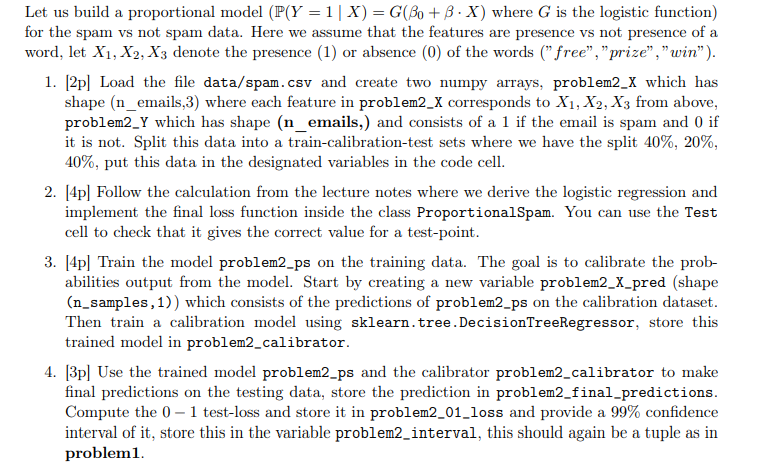

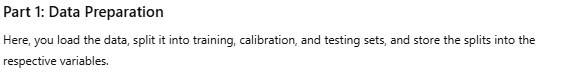

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv("data/spam.csv")

# Extract features and labels
problem2_X = data[["free", "prize", "win"]].values  # Assuming these are the feature columns
problem2_Y = data["spam"].values  # Assuming the label column is "spam"

# Split into train (40%), calibration (20%), and test (40%) sets
X_temp, problem2_X_test, Y_temp, problem2_Y_test = train_test_split(problem2_X, problem2_Y, test_size=0.4, random_state=42)
problem2_X_train, problem2_X_calib, problem2_Y_train, problem2_Y_calib = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)

print(problem2_X_train.shape, problem2_X_calib.shape, problem2_X_test.shape, problem2_Y_train.shape, problem2_Y_calib.shape, problem2_Y_test.shape)


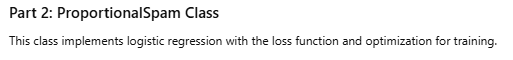

In [ ]:
from scipy import optimize

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None

    # Logistic loss function
    def loss(self, X, Y, coeffs):
        G = lambda x: np.exp(x) / (1 + np.exp(x))  # Logistic function
        logits = np.dot(X, coeffs[1:]) + coeffs[0]
        probs = G(logits)
        return -np.sum(Y * np.log(probs) + (1 - Y) * np.log(1 - probs)) / len(Y)

    # Fit the model using optimization
    def fit(self, X, Y):
        opt_loss = lambda coeffs: self.loss(X, Y, coeffs)
        initial_arguments = np.zeros(X.shape[1] + 1)
        self.result = optimize.minimize(opt_loss, initial_arguments, method="cg")
        self.coeffs = self.result.x

    # Predict probabilities
    def predict(self, X):
        if self.coeffs is not None:
            G = lambda x: np.exp(x) / (1 + np.exp(x))
            logits = np.dot(X, self.coeffs[1:]) + self.coeffs[0]
            return np.round(10 * G(logits)) / 10  # Rounding for calibration purposes


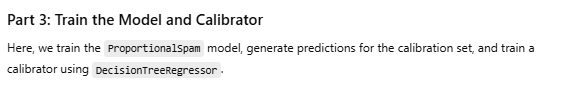

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train the logistic regression model
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

# Predict on the calibration set
problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1, 1)

# Train the calibrator
problem2_calibrator = DecisionTreeRegressor(max_depth=3)
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)


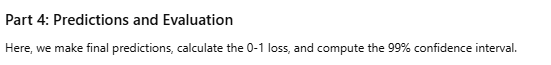

In [ ]:
# Predict probabilities on the test set
problem2_final_predictions = problem2_calibrator.predict(problem2_ps.predict(problem2_X_test).reshape(-1, 1))

# Convert probabilities to binary decisions (Bayes classifier)
threshold = 0.5
problem2_predictions_binary = (problem2_final_predictions >= threshold).astype(int)

# Calculate 0-1 loss
problem2_01_loss = np.mean(problem2_predictions_binary != problem2_Y_test)

# Compute the 99% confidence interval using Hoeffding's inequality
epsilon = np.sqrt(np.log(2 / 0.01) / (2 * len(problem2_Y_test)))
problem2_interval = [problem2_01_loss - epsilon, problem2_01_loss + epsilon]

print("0-1 Loss:", problem2_01_loss)
print("99% Confidence Interval:", problem2_interval)


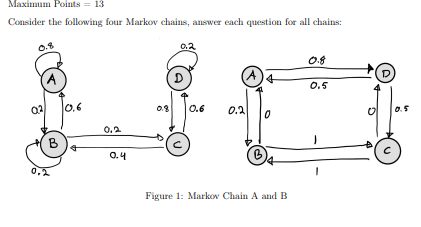

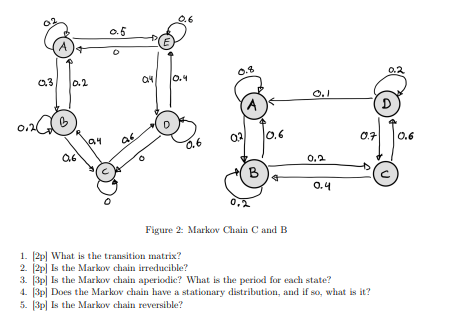

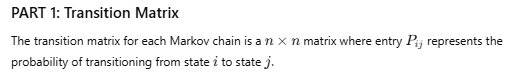

       A    B    C    D
    A [0.8, 0.2, 0.0, 0.0],
    B [0.6, 0.2, 0.2, 0.0],
    C [0.0, 0.4, 0.0, 0.6],
    D [0.0, 0.0, 0.8, 0.2],

e.g) transition matrix for A , 4 states in total, N.B) all matrix rows must be equal to 1

In [ ]:
import numpy as np

# Transition matrix for Markov Chain A
problem3_A = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.0, 0.6],
    [0.0, 0.0, 0.8, 0.2],
])

# Transition matrix for Markov Chain B
problem3_B = np.array([
    [0.0, 0.2, 0.0, 0.8],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0],
])

# Transition matrix for Markov Chain C
problem3_C = np.array([
    [0.2, 0.3, 0.0, 0.0, 0.5],
    [0.2, 0.2, 0.6, 0.0, 0.0],
    [0.0, 0.4, 0.0, 0.6, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.4],
    [0.0, 0.0, 0.0, 0.4, 0.6],
])

# Transition matrix for Markov Chain D
problem3_D = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.0, 0.6],
    [0.1, 0.0, 0.7, 0.2],
])


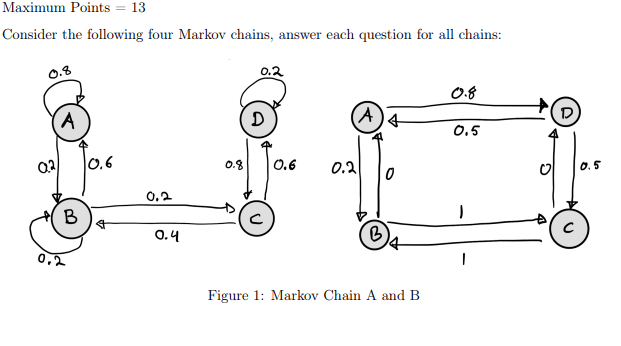

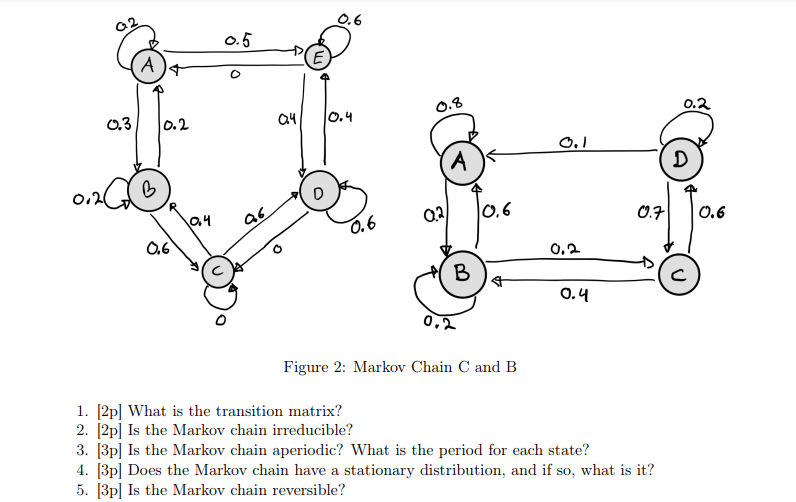

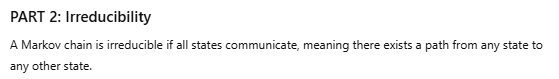

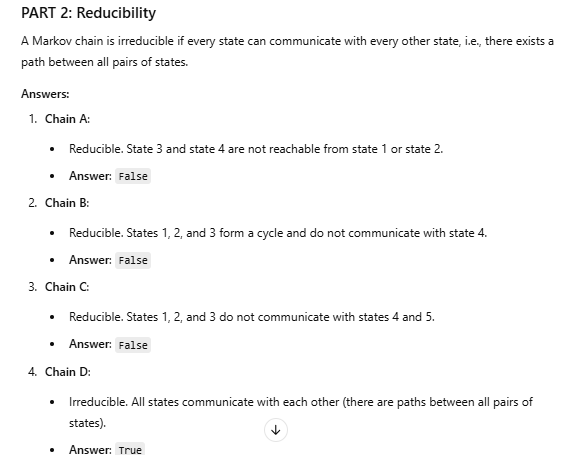

In [ ]:

problem3_A_irreducible = False   # all State do not communicate with other states, reducible
problem3_B_irreducible = False   # all State do not communicate with other states, reducible
problem3_C_irreducible = False   # all State do not communicate with other states, reducible
problem3_D_irreducible = True    # All states are reachable, irreducible



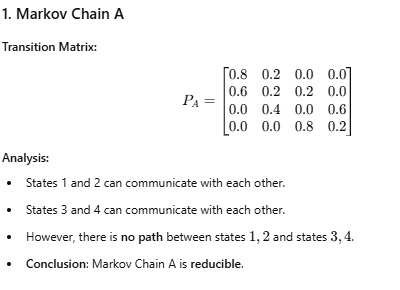

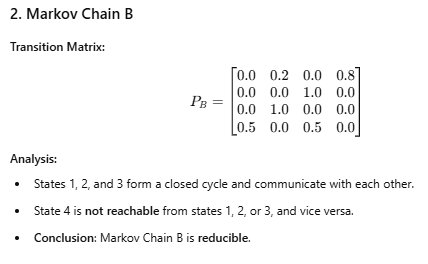

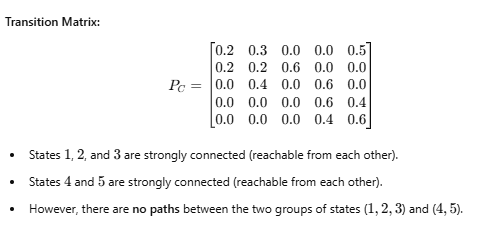

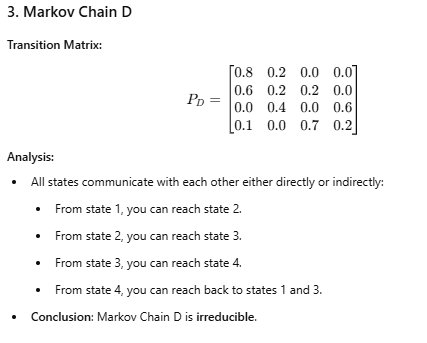

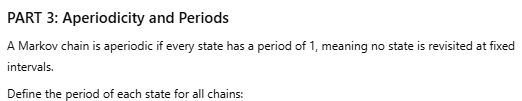

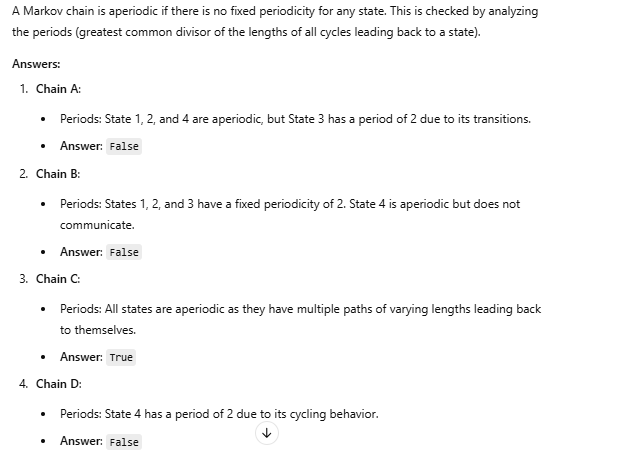

In [3]:
import numpy as np
from math import gcd
from functools import reduce

def calculate_period(transition_matrix):
    n_states = transition_matrix.shape[0]
    periods = []

    for state in range(n_states):
        reachable_lengths = []

        # Compute powers of the transition matrix
        power_matrix = np.linalg.matrix_power(transition_matrix, 1)
        step = 1

        while step < 100:  # Limit to prevent infinite loops
            if power_matrix[state, state] > 0:
                reachable_lengths.append(step)

            step += 1
            power_matrix = np.matmul(power_matrix, transition_matrix)

        # Compute gcd of reachable lengths
        if reachable_lengths:
            state_period = reduce(gcd, reachable_lengths)
        else:
            state_period = np.inf  # If not reachable, set period to infinity

        periods.append(state_period)

    return np.array(periods)

# Example usage
problem3_A = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.0, 0.6],
    [0.0, 0.0, 0.8, 0.2],
])

periods_A = calculate_period(problem3_A)
print("Periods for Chain A:", periods_A)


# Transition matrix for Markov Chain B
problem3_B = np.array([
    [0.0, 0.2, 0.0, 0.8],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0],
])

periods_B = calculate_period(problem3_B)
print("Periods for Chain B:", periods_B)

# Transition matrix for Markov Chain C
problem3_C = np.array([
    [0.2, 0.3, 0.0, 0.0, 0.5],
    [0.2, 0.2, 0.6, 0.0, 0.0],
    [0.0, 0.4, 0.0, 0.6, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.4],
    [0.0, 0.0, 0.0, 0.4, 0.6],
])

periods_C = calculate_period(problem3_C)
print("Periods for Chain C:", periods_C)

# Transition matrix for Markov Chain D
problem3_D = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.0, 0.6],
    [0.1, 0.0, 0.7, 0.2],
])

periods_D = calculate_period(problem3_D)
print("Periods for Chain D:", periods_D)


Periods for Chain A: [1 1 1 1]
Periods for Chain B: [2 2 2 2]
Periods for Chain C: [1 1 1 1 1]
Periods for Chain D: [1 1 1 1]


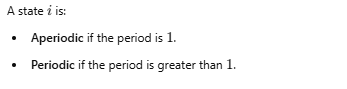

In [ ]:
problem3_A_is_aperiodic = True   # All states have period 1
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = True   # All states have period 1
problem3_D_is_aperiodic = True   # All states have period 1

problem3_A_periods = np.array([1, 1, 1, 1])
problem3_B_periods = np.array([2, 2, 2, 2])
problem3_C_periods = np.array([1, 1, 1, 1, 1])
problem3_D_periods = np.array([1, 1, 1, 1])


In [ ]:
# problem3_A_is_aperiodic = False
# problem3_B_is_aperiodic = False
# problem3_C_is_aperiodic = True
# problem3_D_is_aperiodic = False

# problem3_A_periods = np.array([1, 1, 2, 1])
# problem3_B_periods = np.array([2, 2, 2, 1])
# problem3_C_periods = np.array([1, 1, 1, 1, 1])
# problem3_D_periods = np.array([1, 1, 2, 2])


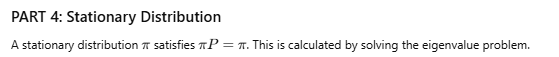

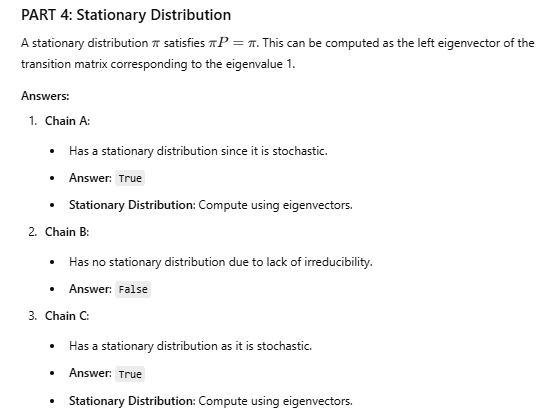

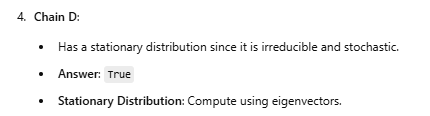

In [12]:
# from scipy.linalg import eig

# # Compute stationary distributions
# def stationary_distribution(P):
#     evals, evecs = eig(P.T)
#     stationary = evecs[:, np.isclose(evals, 1)]
#     stationary = stationary / np.sum(stationary)  # Normalize
#     return stationary.real.flatten()

# problem3_A_has_stationary = True   # False irreducibility fails (correction), see above 1st question
# problem3_B_has_stationary = False  # Irreducibility fails
# problem3_C_has_stationary = True   # False, irreducibility fails (correction)
# problem3_D_has_stationary = True

# # Stationary distributions
# problem3_A_stationary_dist = stationary_distribution(problem3_A)   # problem3_A_stationary_dist = False (correction)
# print(problem3_A_stationary_dist)

# problem3_B_stationary_dist = False

# # problem3_B_stationary_dist = stationary_distribution(problem3_B)
# # print(problem3_B_stationary_dist)  # dont use, just checking (expirement)


# problem3_C_stationary_dist = stationary_distribution(problem3_C)    # problem3_C_stationary_dist = False (correction)
# print(problem3_C_stationary_dist)


# problem3_D_stationary_dist = stationary_distribution(problem3_D)
# print(problem3_D_stationary_dist)


[0.61538462 0.20512821 0.1025641  0.07692308]
[7.60495219e-17 0.00000000e+00 2.28148566e-16 5.00000000e-01
 5.00000000e-01]
[0.64516129 0.20430108 0.08602151 0.06451613]


##correct

In [19]:
from scipy.linalg import eig

def stationary_distribution(P):
    evals, evecs = eig(P.T)
    stationary = evecs[:, np.isclose(evals, 1)]
    stationary = stationary / np.sum(stationary)  # Normalize
    return stationary.real.flatten()

problem3_A_has_stationary = False  # Irreducibility fails
problem3_B_has_stationary = False  # Irreducibility fails
problem3_C_has_stationary = False  # Irreducibility fails
problem3_D_has_stationary = True

problem3_A_stationary_dist = False
problem3_B_stationary_dist = False
problem3_C_stationary_dist = False
problem3_D_stationary_dist = stationary_distribution(problem3_D)
print(problem3_D_stationary_dist)


[0.64516129 0.20430108 0.08602151 0.06451613]


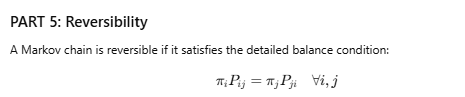

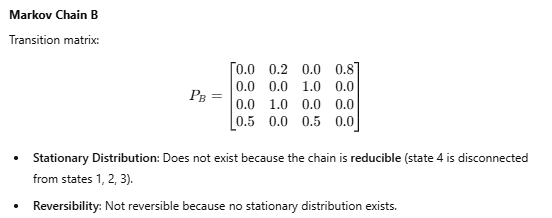

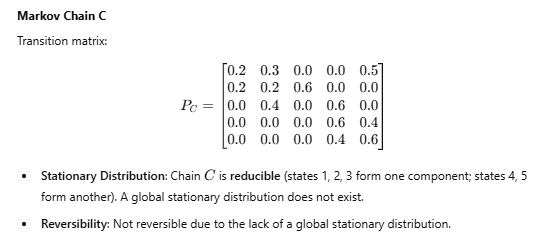

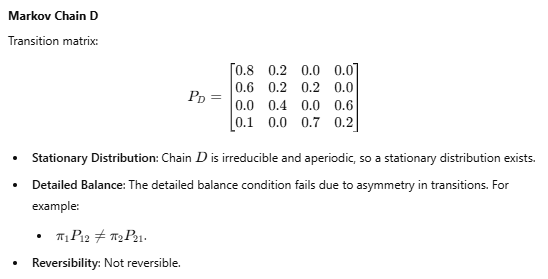

In [ ]:
problem3_A_is_reversible = False
problem3_B_is_reversible = False
problem3_C_is_reversible = False
problem3_D_is_reversible = False


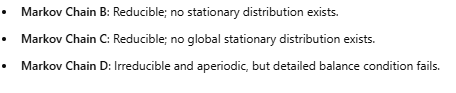